In [1]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
from pymatgen.core.structure import Structure

In [2]:
degaus_005_file=pd.read_csv('Sc2/PBEsol_pres/degauss=0.005/Sc2_result.csv')
degaus_015_file=pd.read_csv('Sc2/PBEsol_pres/degauss=0.015/Sc2_result.csv')
degaus_005_file['degauss']=np.ones(len(degaus_005_file))*0.005
degaus_015_file['degauss']=np.ones(len(degaus_015_file))*0.015

In [3]:
df=pd.concat([degaus_005_file,degaus_015_file])

In [4]:
df

,Unnamed: 0,degauss,k_density,k_list,k_offset,cutoff_wfc,lattice_parameter_initial,number_of_bands,number_of_k_points,fft_grid,...,energy_accuracy,energy_smearing,energy_one_electron,energy_hartree,energy_xc,energy_ewald,energy_one_center_paw,scf_iterations,total_force,label
0,0,0.005,1,"[1, 1, 1]","[0, 0, 0]",90.0,3.291218,15,1,"[54, 54, 90]",...,8.843700e-08,0.008138,-990.057347,546.896134,-466.626896,-1720.693125,-1594.546663,41.0,0.0,Sc2_0
1,1,0.005,4,"[2, 2, 1]","[0, 0, 0]",90.0,3.291218,15,2,"[54, 54, 90]",...,8.571586e-08,-0.017113,-1014.421782,577.768447,-471.137212,-1720.693125,-1593.379941,16.0,0.0,Sc2_1
2,2,0.005,6,"[2, 2, 2]","[0, 0, 0]",90.0,3.291218,15,4,"[54, 54, 90]",...,8.979757e-08,-0.017113,-1013.577250,576.930199,-470.994668,-1720.693125,-1593.437303,13.0,0.0,Sc2_2
3,3,0.005,7,"[3, 3, 2]","[0, 0, 0]",90.0,3.291218,15,6,"[54, 54, 90]",...,4.081708e-08,-0.012930,-1011.842724,576.006973,-470.984232,-1720.693125,-1593.530889,11.0,0.0,Sc2_3
4,4,0.005,10,"[4, 4, 2]","[0, 0, 0]",90.0,3.291218,15,8,"[54, 54, 90]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sc2_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,83,0.015,38,"[12, 12, 8]","[0, 0, 0]",70.0,3.291218,15,95,"[48, 48, 80]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sc2_83
84,84,0.015,40,"[13, 13, 8]","[0, 0, 0]",70.0,3.291218,15,105,"[48, 48, 80]",...,8.979757e-09,-0.007981,-1010.949221,574.780223,-470.779784,-1720.693125,-1593.577574,30.0,0.0,Sc2_84
85,85,0.015,43,"[14, 14, 9]","[0, 0, 0]",70.0,3.291218,15,120,"[48, 48, 80]",...,3.537480e-08,-0.007728,-1010.960091,574.793553,-470.782376,-1720.693125,-1593.577708,25.0,0.0,Sc2_85
86,86,0.015,47,"[15, 15, 9]","[0, 0, 0]",70.0,3.291218,15,135,"[48, 48, 80]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sc2_86


In [15]:
cif_file="Sc.cif"
pymatgen_structure=Structure.from_file("/Users/elena.patyukova/Documents/DFT-data/convergence_project/structures/structures_1/"+cif_file)
k_distance=[]
for i in range(len(df)):
    kpoints=df.iloc[i]['k_list']
    string=kpoints
    string=string.replace('[','')
    string=string.replace(']','')
    string=string.split(',')
    kpoints=[]
    for xa in string:
        kpoints.append(int(xa))
    k_dist=[]
    for a,b in zip(kpoints,pymatgen_structure.lattice.abc):
        k_dist.append(1/b/a)
    k_distance.append(max(k_dist))
df['k_distance']=k_distance

/opt/miniconda3/envs/aiida/lib/python3.12/site-packages/pymatgen/io/cif.py:1290: UserWarning: Issues encountered while parsing CIF: 4 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


We can see in the graph below that: <br>
(1) decreasing cutoff_wfc leads to **increase** in energy (in the converged region) <br>
(2) increasing degauss leads to **lowering** of energy (in the converged region) <br>

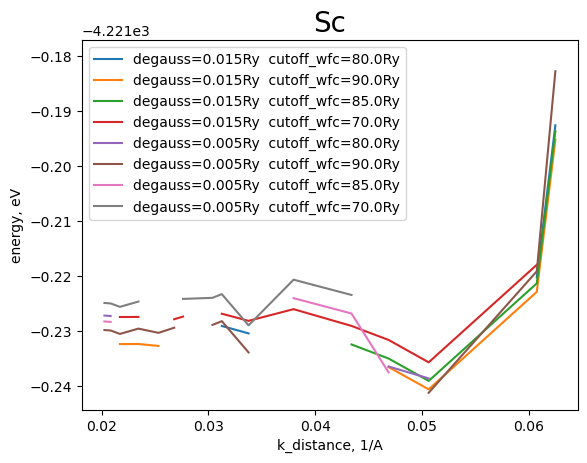

In [16]:
for degauss in set(df['degauss'].values):
    for cutoff_wfc in set(df['cutoff_wfc'].values):
        da=df.loc[df['degauss']==degauss]
        db=da.loc[da['cutoff_wfc']==cutoff_wfc]
        x=db['k_distance'].values
        y=db['energy'].values
        label='degauss='+str(degauss)+'Ry  '+'cutoff_wfc='+str(cutoff_wfc)+'Ry'
        plt.plot(x[6:],y[6:],label=label)
plt.xlabel('k_distance, 1/A',)
plt.ylabel('energy, eV')
plt.title('Sc',fontsize=20)
plt.legend()
plt.show()

In [25]:
degaus_005_file=pd.read_csv('Cr2/PBEsol_pres/degauss=0.005/Cr2_result.csv')
degaus_015_file=pd.read_csv('Cr2/PBEsol_pres/degauss=0.015/Cr2_result.csv')
degaus_005_file['degauss']=np.ones(len(degaus_005_file))*0.005
degaus_015_file['degauss']=np.ones(len(degaus_015_file))*0.015

In [26]:
df=pd.concat([degaus_005_file,degaus_015_file])

In [27]:
cif_file="Cr.cif"
pymatgen_structure=Structure.from_file("/Users/elena.patyukova/Documents/DFT-data/convergence_project/structures/structures_1/"+cif_file)
k_distance=[]
for i in range(len(df)):
    kpoints=df.iloc[i]['k_list']
    string=kpoints
    string=string.replace('[','')
    string=string.replace(']','')
    string=string.split(',')
    kpoints=[]
    for xa in string:
        kpoints.append(int(xa))
    k_dist=[]
    for a,b in zip(kpoints,pymatgen_structure.lattice.abc):
        k_dist.append(1/b/a)
    k_distance.append(max(k_dist))
df['k_distance']=k_distance

In [28]:
set(df['cutoff_wfc'].values)

{20.0, 30.0, 35.0, 40.0}

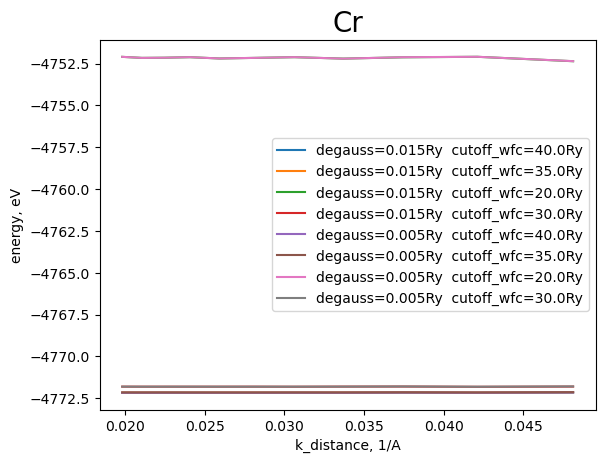

In [29]:
for degauss in set(df['degauss'].values):
    for cutoff_wfc in set(df['cutoff_wfc'].values):
        da=df.loc[df['degauss']==degauss]
        db=da.loc[da['cutoff_wfc']==cutoff_wfc]
        x=db['k_distance'].values
        y=db['energy'].values
        label='degauss='+str(degauss)+'Ry  '+'cutoff_wfc='+str(cutoff_wfc)+'Ry'
        plt.plot(x[6:],y[6:],label=label)
# coridor_x=[1,48]
# coridor_y1=[-4221.2298409887-0.001,-4221.2298409887-0.001]
# coridor_y2=[-4221.2298409887+0.001,-4221.2298409887+0.001]
# plt.plot(coridor_x,coridor_y1)
# plt.plot(coridor_x,coridor_y2)
plt.xlabel('k_distance, 1/A')
plt.ylabel('energy, eV')
plt.title('Cr',fontsize=20)
plt.legend()
plt.show()

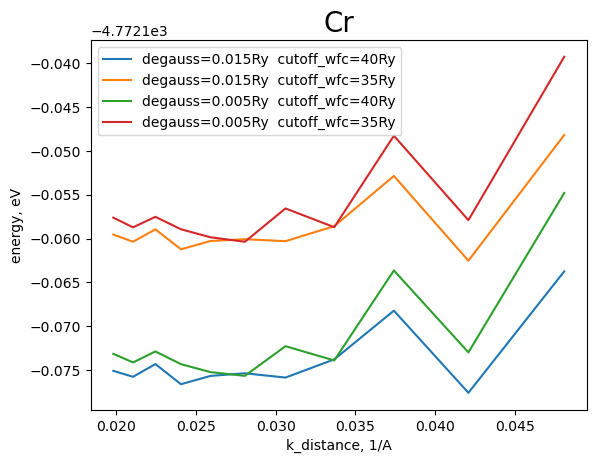

In [31]:
for degauss in set(df['degauss'].values):
    for cutoff_wfc in {40,35}:
        da=df.loc[df['degauss']==degauss]
        db=da.loc[da['cutoff_wfc']==cutoff_wfc]
        x=db['k_distance'].values
        y=db['energy'].values
        label='degauss='+str(degauss)+'Ry  '+'cutoff_wfc='+str(cutoff_wfc)+'Ry'
        plt.plot(x[6:],y[6:],label=label)
plt.title('Cr',fontsize=20)
plt.xlabel('k_distance, 1/A')
plt.ylabel('energy, eV')
plt.legend()
plt.show()

In [32]:
degauss_005_file=pd.read_csv('Ti3/PBEsol_pres/degauss=0.005/Ti3_result.csv')
degauss_015_file=pd.read_csv('Ti3/PBEsol_pres/degauss=0.015/Ti3_result.csv')
degauss_005_file['degauss']=np.ones(len(degauss_005_file))*0.005
degauss_015_file['degauss']=np.ones(len(degauss_015_file))*0.015

In [33]:
df=pd.concat([degauss_005_file,degauss_015_file])

In [34]:
cif_file="Ti.cif"
pymatgen_structure=Structure.from_file("/Users/elena.patyukova/Documents/DFT-data/convergence_project/structures/structures_1/"+cif_file)
k_distance=[]
for i in range(len(df)):
    kpoints=df.iloc[i]['k_list']
    string=kpoints
    string=string.replace('[','')
    string=string.replace(']','')
    string=string.split(',')
    kpoints=[]
    for xa in string:
        kpoints.append(int(xa))
    k_dist=[]
    for a,b in zip(kpoints,pymatgen_structure.lattice.abc):
        k_dist.append(1/b/a)
    k_distance.append(max(k_dist))
df['k_distance']=k_distance

/opt/miniconda3/envs/aiida/lib/python3.12/site-packages/pymatgen/io/cif.py:1290: UserWarning: Issues encountered while parsing CIF: 4 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


In [35]:
set(df['cutoff_wfc'].values)

{20.0, 30.0, 35.0, 40.0}

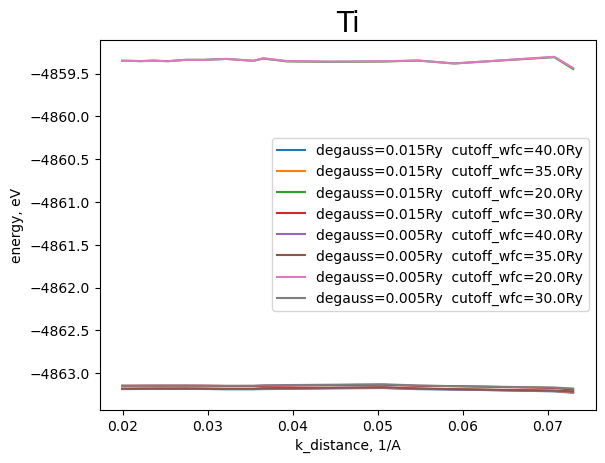

In [36]:
for degauss in set(df['degauss'].values):
    for cutoff_wfc in set(df['cutoff_wfc'].values):
        da=df.loc[df['degauss']==degauss]
        db=da.loc[da['cutoff_wfc']==cutoff_wfc]
        x=db['k_distance'].values
        y=db['energy'].values
        label='degauss='+str(degauss)+'Ry  '+'cutoff_wfc='+str(cutoff_wfc)+'Ry'
        plt.plot(x[6:],y[6:],label=label)
plt.title('Ti',fontsize=20)
plt.xlabel('k_distance, 1/A')
plt.ylabel('energy, eV')
plt.legend()
plt.show()

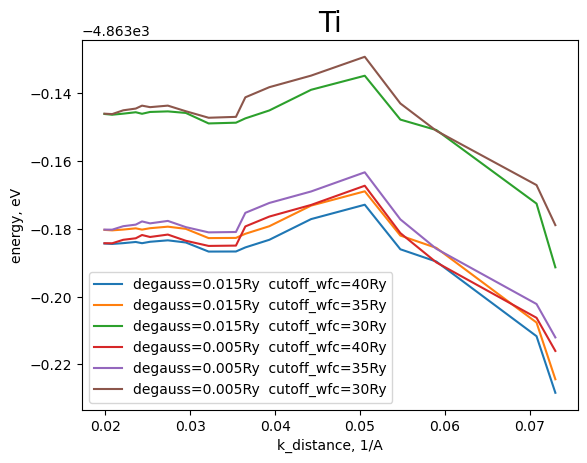

In [37]:
for degauss in set(df['degauss'].values):
    for cutoff_wfc in {40,35,30}:
        da=df.loc[df['degauss']==degauss]
        db=da.loc[da['cutoff_wfc']==cutoff_wfc]
        x=db['k_distance'].values
        y=db['energy'].values
        label='degauss='+str(degauss)+'Ry  '+'cutoff_wfc='+str(cutoff_wfc)+'Ry'
        plt.plot(x[6:],y[6:],label=label)
plt.xlabel('k_distance, 1/A')
plt.ylabel('energy, eV')
plt.title('Ti',fontsize=20)
plt.legend()
plt.show()

In [38]:
degauss_005_file=pd.read_csv('V1/PBEsol_pres/degauss=0.005/V1_result.csv')
degauss_015_file=pd.read_csv('V1/PBEsol_pres/degauss=0.015/V1_result.csv')
degauss_005_file['degauss']=np.ones(len(degauss_005_file))*0.005
degauss_015_file['degauss']=np.ones(len(degauss_015_file))*0.015

In [39]:
df=pd.concat([degauss_005_file,degauss_015_file])

In [40]:
cif_file="V.cif"
pymatgen_structure=Structure.from_file("/Users/elena.patyukova/Documents/DFT-data/convergence_project/structures/structures_1/"+cif_file)
k_distance=[]
for i in range(len(df)):
    kpoints=df.iloc[i]['k_list']
    string=kpoints
    string=string.replace('[','')
    string=string.replace(']','')
    string=string.split(',')
    kpoints=[]
    for xa in string:
        kpoints.append(int(xa))
    k_dist=[]
    for a,b in zip(kpoints,pymatgen_structure.lattice.abc):
        k_dist.append(1/b/a)
    k_distance.append(max(k_dist))
df['k_distance']=k_distance

In [41]:
set(df['cutoff_wfc'].values)

{20.0, 30.0, 35.0, 40.0}

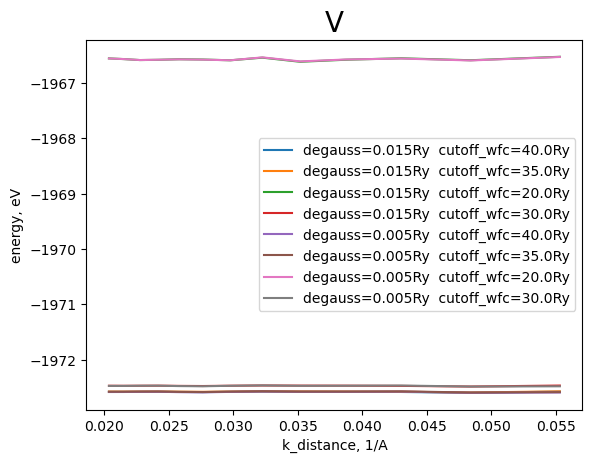

In [42]:
for degauss in set(df['degauss'].values):
    for cutoff_wfc in set(df['cutoff_wfc'].values):
        da=df.loc[df['degauss']==degauss]
        db=da.loc[da['cutoff_wfc']==cutoff_wfc]
        x=db['k_distance'].values
        y=db['energy'].values
        label='degauss='+str(degauss)+'Ry  '+'cutoff_wfc='+str(cutoff_wfc)+'Ry'
        plt.plot(x[6:],y[6:],label=label)
# coridor_x=[1,48]
# coridor_y1=[-4221.2298409887-0.001,-4221.2298409887-0.001]
# coridor_y2=[-4221.2298409887+0.001,-4221.2298409887+0.001]
# plt.plot(coridor_x,coridor_y1)
# plt.plot(coridor_x,coridor_y2)
plt.title('V',fontsize=20)
plt.xlabel('k_distance, 1/A')
plt.ylabel('energy, eV')
plt.legend()
plt.show()

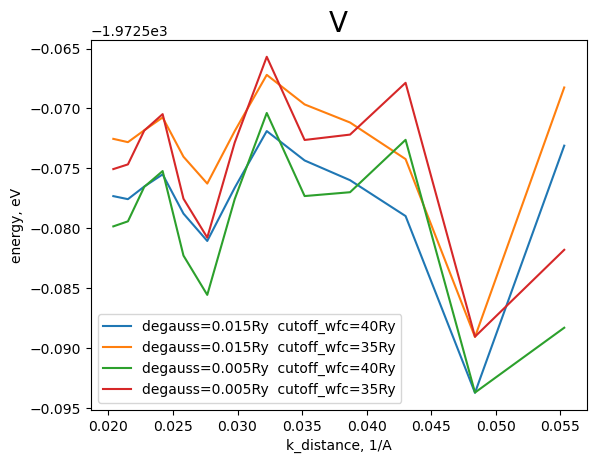

In [43]:
for degauss in set(df['degauss'].values):
    for cutoff_wfc in {40,35}:
        da=df.loc[df['degauss']==degauss]
        db=da.loc[da['cutoff_wfc']==cutoff_wfc]
        x=db['k_distance'].values
        y=db['energy'].values
        label='degauss='+str(degauss)+'Ry  '+'cutoff_wfc='+str(cutoff_wfc)+'Ry'
        plt.plot(x[6:],y[6:],label=label)
# coridor_x=[1,48]
# coridor_y1=[-4221.2298409887-0.001,-4221.2298409887-0.001]
# coridor_y2=[-4221.2298409887+0.001,-4221.2298409887+0.001]
# plt.plot(coridor_x,coridor_y1)
# plt.plot(coridor_x,coridor_y2)
plt.title('V',fontsize=20)
plt.xlabel('k_distance, 1/A')
plt.ylabel('energy, eV')
plt.legend()
plt.show()

In [83]:
degauss_005_file=pd.read_csv('Cu1/PBEsol_pres/degauss=0.005/Cu1_result.csv')
degauss_015_file=pd.read_csv('Cu1/PBEsol_pres/degauss=0.015/Cu1_result.csv')
degauss_005_file['degauss']=np.ones(len(degauss_005_file))*0.005
degauss_015_file['degauss']=np.ones(len(degauss_015_file))*0.015

In [84]:
df=pd.concat([degauss_005_file,degauss_015_file])
# df=degauss_005_file

In [85]:
cif_file="Cu.cif"
pymatgen_structure=Structure.from_file("/Users/elena.patyukova/Documents/DFT-data/convergence_project/structures/structures_1/"+cif_file)
k_distance=[]
for i in range(len(df)):
    kpoints=df.iloc[i]['k_list']
    string=kpoints
    string=string.replace('[','')
    string=string.replace(']','')
    string=string.split(',')
    kpoints=[]
    for xa in string:
        kpoints.append(int(xa))
    k_dist=[]
    for a,b in zip(kpoints,pymatgen_structure.lattice.abc):
        k_dist.append(1/b/a)
    k_distance.append(max(k_dist))
df['k_distance']=k_distance

In [86]:
set(df['cutoff_wfc'].values)

{70.0, 80.0, 85.0, 90.0}

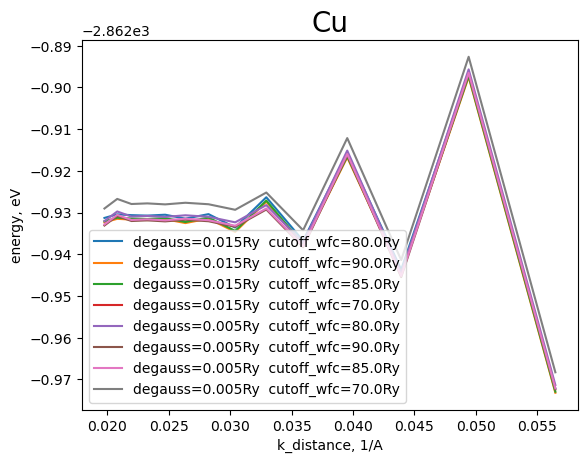

In [87]:
for degauss in set(df['degauss'].values):
    for cutoff_wfc in set(df['cutoff_wfc'].values):
        da=df.loc[df['degauss']==degauss]
        db=da.loc[da['cutoff_wfc']==cutoff_wfc]
        x=db['k_distance'].values
        y=db['energy'].values
        label='degauss='+str(degauss)+'Ry  '+'cutoff_wfc='+str(cutoff_wfc)+'Ry'
        plt.plot(x[6:],y[6:],label=label)
# coridor_x=[1,48]
# coridor_y1=[-4221.2298409887-0.001,-4221.2298409887-0.001]
# coridor_y2=[-4221.2298409887+0.001,-4221.2298409887+0.001]
# plt.plot(coridor_x,coridor_y1)
# plt.plot(coridor_x,coridor_y2)
plt.title('Cu',fontsize=20)
plt.xlabel('k_distance, 1/A')
plt.ylabel('energy, eV')
plt.legend()
plt.show()

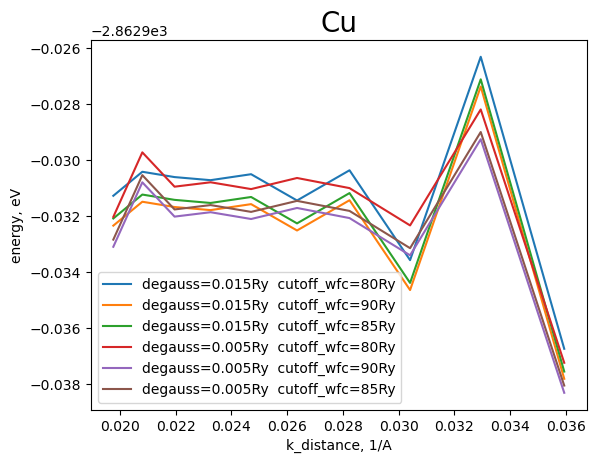

In [88]:
for degauss in set(df['degauss'].values):
    for cutoff_wfc in {90,80,85}:
        da=df.loc[df['degauss']==degauss]
        db=da.loc[da['cutoff_wfc']==cutoff_wfc]
        x=db['k_distance'].values
        y=db['energy'].values
        label='degauss='+str(degauss)+'Ry  '+'cutoff_wfc='+str(cutoff_wfc)+'Ry'
        plt.plot(x[10:],y[10:],label=label)
# coridor_x=[1,48]
# coridor_y1=[-4221.2298409887-0.001,-4221.2298409887-0.001]
# coridor_y2=[-4221.2298409887+0.001,-4221.2298409887+0.001]
# plt.plot(coridor_x,coridor_y1)
# plt.plot(coridor_x,coridor_y2)
plt.title('Cu',fontsize=20)
plt.xlabel('k_distance, 1/A')
plt.ylabel('energy, eV')
plt.legend()
plt.show()

In [99]:
degauss_005_file=pd.read_csv('Zn2/PBEsol_pres/degauss=0.005/Zn2_result.csv')
degauss_005_file_ppcg=pd.read_csv('Zn2/PBEsol_pres/degauss=0.005/Zn2_result_ppcg.csv')
# degauss_015_file=pd.read_csv('Cu1/PBEsol_pres/degauss=0.015/C11_result.csv')
degauss_005_file['degauss']=np.ones(len(degauss_005_file))*0.005
# degauss_015_file['degauss']=np.ones(len(degauss_015_file))*0.015

In [100]:
# df=pd.concat([degauss_005_file,degauss_015_file])
df=degauss_005_file
dff=degauss_005_file_ppcg

In [103]:
len(df),len(dff)

(116, 87)

In [104]:
cif_file="Zn.cif"
pymatgen_structure=Structure.from_file("/Users/elena.patyukova/Documents/DFT-data/convergence_project/structures/structures_1/"+cif_file)
k_distance=[]
for i in range(len(df)):
    kpoints=df.iloc[i]['k_list']
    string=kpoints
    string=string.replace('[','')
    string=string.replace(']','')
    string=string.split(',')
    kpoints=[]
    for xa in string:
        kpoints.append(int(xa))
    k_dist=[]
    for a,b in zip(kpoints,pymatgen_structure.lattice.abc):
        k_dist.append(1/b/a)
    k_distance.append(max(k_dist))
df['k_distance']=k_distance
k_distance=[]
for i in range(len(dff)):
    kpoints=df.iloc[i]['k_list']
    string=kpoints
    string=string.replace('[','')
    string=string.replace(']','')
    string=string.split(',')
    kpoints=[]
    for xa in string:
        kpoints.append(int(xa))
    k_dist=[]
    for a,b in zip(kpoints,pymatgen_structure.lattice.abc):
        k_dist.append(1/b/a)
    k_distance.append(max(k_dist))
dff['k_distance']=k_distance

/opt/miniconda3/envs/aiida/lib/python3.12/site-packages/pymatgen/io/cif.py:1290: UserWarning: Issues encountered while parsing CIF: 4 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


In [96]:
pymatgen_structure

Structure Summary
Lattice
    abc : 2.61436012 2.61435948 4.87316102
 angles : 90.0 90.0 119.99998276
 volume : 28.84510888370001
      A : 2.61436012 0.0 1.6008338763882452e-16
      B : -1.307179058743589 2.2641021176281106 1.6008334845012695e-16
      C : 0.0 0.0 4.87316102
    pbc : True True True
PeriodicSite: Zn0 (Zn) (6.675e-07, 1.509, 1.218) [0.3333, 0.6667, 0.25]
PeriodicSite: Zn1 (Zn) (1.307, 0.7547, 3.655) [0.6667, 0.3333, 0.75]

In [92]:
df

,Unnamed: 0,degauss,k_density,k_list,k_offset,cutoff_wfc,lattice_parameter_initial,number_of_bands,number_of_k_points,fft_grid,...,energy_accuracy,energy_smearing,energy_one_electron,energy_hartree,energy_xc,energy_ewald,scf_iterations,total_force,label,k_distance
0,0,0.005,1,"[1, 1, 1]","[0, 0, 0]",90.0,2.614347,24,1,"[45, 45, 80]",...,4.761992e-06,0.000010,-9601.254472,4986.235565,-1133.274315,-6815.092407,8,0.0,Zn2_0,0.382503
1,1,0.005,3,"[2, 2, 1]","[0, 0, 0]",90.0,2.614347,24,2,"[45, 45, 80]",...,7.619187e-06,-0.012480,-9619.087283,5020.480894,-1135.837210,-6815.092407,6,0.0,Zn2_1,0.205206
2,2,0.005,5,"[2, 2, 2]","[0, 0, 0]",90.0,2.614347,24,4,"[45, 45, 80]",...,2.721138e-06,-0.004048,-9612.988262,5014.250375,-1135.316897,-6815.092407,6,0.0,Zn2_2,0.191251
3,3,0.005,6,"[3, 3, 2]","[0, 0, 0]",90.0,2.614347,24,6,"[45, 45, 80]",...,1.142878e-05,0.000980,-9622.603493,5023.177335,-1135.753221,-6815.092407,5,0.0,Zn2_3,0.127501
4,4,0.005,8,"[4, 4, 2]","[0, 0, 0]",90.0,2.614347,24,8,"[45, 45, 80]",...,1.360569e-06,-0.001091,-9620.330790,5019.673455,-1135.634240,-6815.092407,6,0.0,Zn2_4,0.102603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,111,0.005,42,"[17, 17, 9]","[0, 0, 0]",70.0,2.614347,24,165,"[40, 40, 72]",...,3.945651e-08,-0.000004,-9620.533605,5020.242107,-1135.669542,-6815.092407,6,0.0,Zn2_111,0.022801
112,112,0.005,44,"[17, 17, 10]","[0, 0, 0]",70.0,2.614347,24,198,"[40, 40, 72]",...,4.761992e-08,-0.000032,-9620.524270,5020.233088,-1135.671302,-6815.092407,6,0.0,Zn2_112,0.022500
113,113,0.005,45,"[18, 18, 10]","[0, 0, 0]",70.0,2.614347,24,222,"[40, 40, 72]",...,2.585081e-08,-0.000022,-9620.479695,5020.166772,-1135.664154,-6815.092407,6,0.0,Zn2_113,0.021250
114,114,0.005,48,"[19, 19, 10]","[0, 0, 0]",70.0,2.614347,24,240,"[40, 40, 72]",...,1.360569e-07,-0.000229,-9620.582989,5020.282753,-1135.674618,-6815.092407,6,0.0,Zn2_114,0.020521


In [56]:
set(df['cutoff_wfc'].values)

{70.0, 80.0, 85.0, 90.0}

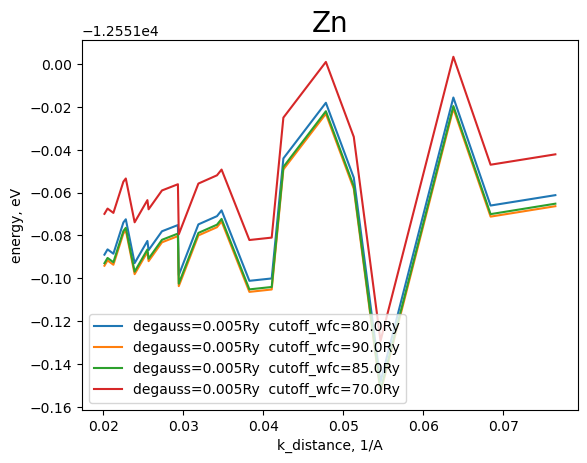

In [57]:
for degauss in set(df['degauss'].values):
    for cutoff_wfc in set(df['cutoff_wfc'].values):
        da=df.loc[df['degauss']==degauss]
        db=da.loc[da['cutoff_wfc']==cutoff_wfc]
        x=db['k_distance'].values
        y=db['energy'].values
        label='degauss='+str(degauss)+'Ry  '+'cutoff_wfc='+str(cutoff_wfc)+'Ry'
        plt.plot(x[6:],y[6:],label=label)

plt.title('Zn',fontsize=20)
plt.xlabel('k_distance, 1/A')
plt.ylabel('energy, eV')
plt.legend()
plt.show()

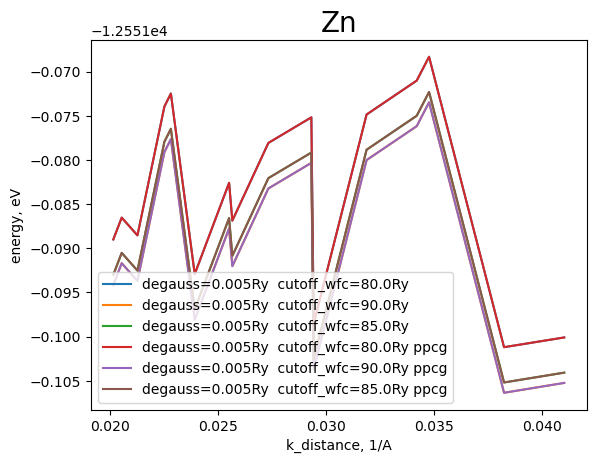

In [105]:
for degauss in set(df['degauss'].values):
    for cutoff_wfc in {80.0, 85.0, 90.0}:
        da=df.loc[df['degauss']==degauss]
        db=da.loc[da['cutoff_wfc']==cutoff_wfc]
        x=db['k_distance'].values
        y=db['energy'].values
        label='degauss='+str(degauss)+'Ry  '+'cutoff_wfc='+str(cutoff_wfc)+'Ry'
        plt.plot(x[13:],y[13:],label=label)
for degauss in set(df['degauss'].values):
    for cutoff_wfc in {80.0, 85.0, 90.0}:
        da=dff.loc[dff['degauss']==degauss]
        db=da.loc[da['cutoff_wfc']==cutoff_wfc]
        x=db['k_distance'].values
        y=db['energy'].values
        label='degauss='+str(degauss)+'Ry  '+'cutoff_wfc='+str(cutoff_wfc)+'Ry'+' ppcg'
        plt.plot(x[13:],y[13:],label=label)
plt.title('Zn',fontsize=20)
plt.xlabel('k_distance, 1/A')
plt.ylabel('energy, eV')
plt.legend()
plt.show()

In [60]:
degauss_005_file=pd.read_csv('Mg2/PBEsol_pres/degauss=0.005/Mg2_result.csv')
# degauss_015_file=pd.read_csv('Cu1/PBEsol_pres/degauss=0.015/C11_result.csv')
degauss_005_file['degauss']=np.ones(len(degauss_005_file))*0.005
# degauss_015_file['degauss']=np.ones(len(degauss_015_file))*0.015

In [61]:
# df=pd.concat([degauss_005_file,degauss_015_file])
df=degauss_005_file

In [63]:
cif_file="Mg.cif"
pymatgen_structure=Structure.from_file("/Users/elena.patyukova/Documents/DFT-data/convergence_project/structures/structures_1/"+cif_file)
k_distance=[]
for i in range(len(df)):
    kpoints=df.iloc[i]['k_list']
    string=kpoints
    string=string.replace('[','')
    string=string.replace(']','')
    string=string.split(',')
    kpoints=[]
    for xa in string:
        kpoints.append(int(xa))
    k_dist=[]
    for a,b in zip(kpoints,pymatgen_structure.lattice.abc):
        k_dist.append(1/b/a)
    k_distance.append(max(k_dist))
df['k_distance']=k_distance

/opt/miniconda3/envs/aiida/lib/python3.12/site-packages/pymatgen/io/cif.py:1290: UserWarning: Issues encountered while parsing CIF: 4 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


In [64]:
set(df['cutoff_wfc'].values)

{25.0, 35.0, 40.0, 45.0}

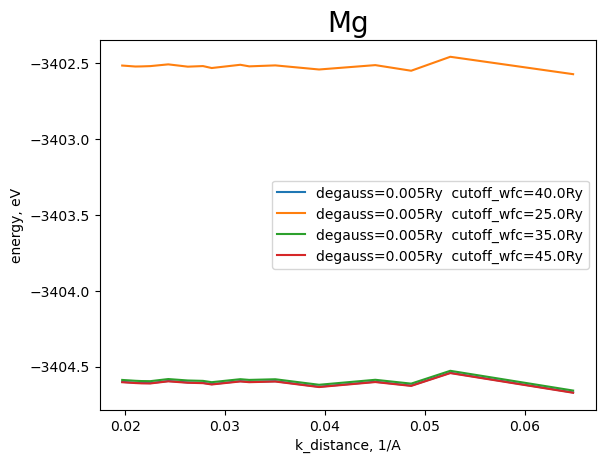

In [66]:
for degauss in set(df['degauss'].values):
    for cutoff_wfc in set(df['cutoff_wfc'].values):
        da=df.loc[df['degauss']==degauss]
        db=da.loc[da['cutoff_wfc']==cutoff_wfc]
        x=db['k_distance'].values
        y=db['energy'].values
        label='degauss='+str(degauss)+'Ry  '+'cutoff_wfc='+str(cutoff_wfc)+'Ry'
        plt.plot(x[6:],y[6:],label=label)
plt.title('Mg',fontsize=20)
plt.xlabel('k_distance, 1/A')
plt.ylabel('energy, eV')
plt.legend()
plt.show()

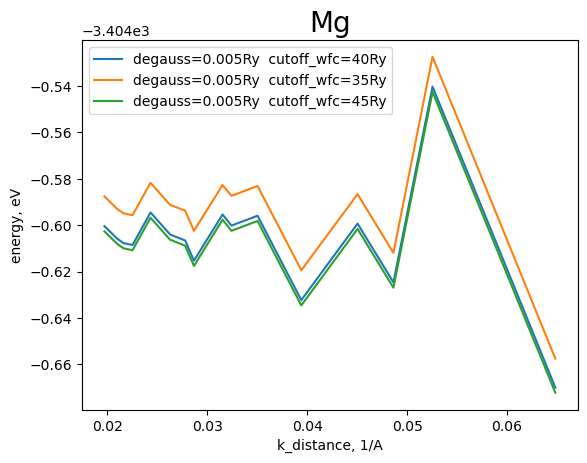

In [67]:
for degauss in set(df['degauss'].values):
    for cutoff_wfc in {45,40,35}:
        da=df.loc[df['degauss']==degauss]
        db=da.loc[da['cutoff_wfc']==cutoff_wfc]
        x=db['k_distance'].values
        y=db['energy'].values
        label='degauss='+str(degauss)+'Ry  '+'cutoff_wfc='+str(cutoff_wfc)+'Ry'
        plt.plot(x[6:],y[6:],label=label)
plt.title('Mg',fontsize=20)
plt.xlabel('k_distance, 1/A')
plt.ylabel('energy, eV')
plt.legend()
plt.show()

In [68]:
degauss_005_file=pd.read_csv('Ca1/PBEsol_pres/degauss=0.005/Ca1_result.csv')
# degauss_015_file=pd.read_csv('Cu1/PBEsol_pres/degauss=0.015/C11_result.csv')
degauss_005_file['degauss']=np.ones(len(degauss_005_file))*0.005
# degauss_015_file['degauss']=np.ones(len(degauss_015_file))*0.015

In [69]:
# df=pd.concat([degauss_005_file,degauss_015_file])
df=degauss_005_file

In [70]:
cif_file="Ca.cif"
pymatgen_structure=Structure.from_file("/Users/elena.patyukova/Documents/DFT-data/convergence_project/structures/structures_1/"+cif_file)
k_distance=[]
for i in range(len(df)):
    kpoints=df.iloc[i]['k_list']
    string=kpoints
    string=string.replace('[','')
    string=string.replace(']','')
    string=string.split(',')
    kpoints=[]
    for xa in string:
        kpoints.append(int(xa))
    k_dist=[]
    for a,b in zip(kpoints,pymatgen_structure.lattice.abc):
        k_dist.append(1/b/a)
    k_distance.append(max(k_dist))
df['k_distance']=k_distance

In [180]:
set(df['cutoff_wfc'].values)

{10.0, 20.0, 25.0, 30.0}

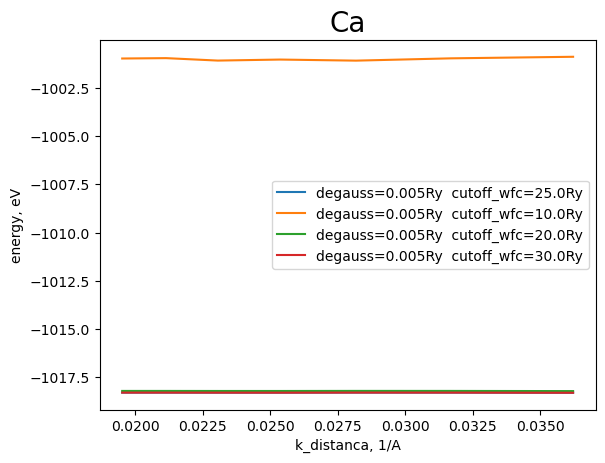

In [71]:
for degauss in set(df['degauss'].values):
    for cutoff_wfc in set(df['cutoff_wfc'].values):
        da=df.loc[df['degauss']==degauss]
        db=da.loc[da['cutoff_wfc']==cutoff_wfc]
        x=db['k_distance'].values
        y=db['energy'].values
        label='degauss='+str(degauss)+'Ry  '+'cutoff_wfc='+str(cutoff_wfc)+'Ry'
        plt.plot(x[6:],y[6:],label=label)
plt.title('Ca',fontsize=20)
plt.xlabel('k_distanca, 1/A')
plt.ylabel('energy, eV')
plt.legend()
plt.show()

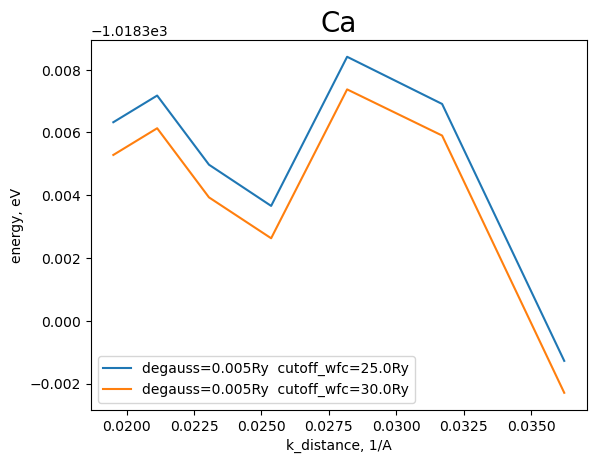

In [72]:
for degauss in set(df['degauss'].values):
    for cutoff_wfc in {25.0, 30.0}:
        da=df.loc[df['degauss']==degauss]
        db=da.loc[da['cutoff_wfc']==cutoff_wfc]
        x=db['k_distance'].values
        y=db['energy'].values
        label='degauss='+str(degauss)+'Ry  '+'cutoff_wfc='+str(cutoff_wfc)+'Ry'
        plt.plot(x[6:],y[6:],label=label)
plt.title('Ca',fontsize=20)
plt.xlabel('k_distance, 1/A')
plt.ylabel('energy, eV')
plt.legend()
plt.show()

In [74]:
degauss_005_file=pd.read_csv('Na2/PBEsol_pres/degauss=0.005/Na2_result.csv')
# degauss_015_file=pd.read_csv('Cu1/PBEsol_pres/degauss=0.015/C11_result.csv')
degauss_005_file['degauss']=np.ones(len(degauss_005_file))*0.005
# degauss_015_file['degauss']=np.ones(len(degauss_015_file))*0.015

In [75]:
# df=pd.concat([degauss_005_file,degauss_015_file])
df=degauss_005_file

In [76]:
cif_file="Na.cif"
pymatgen_structure=Structure.from_file("/Users/elena.patyukova/Documents/DFT-data/convergence_project/structures/structures_1/"+cif_file)
k_distance=[]
for i in range(len(df)):
    kpoints=df.iloc[i]['k_list']
    string=kpoints
    string=string.replace('[','')
    string=string.replace(']','')
    string=string.split(',')
    kpoints=[]
    for xa in string:
        kpoints.append(int(xa))
    k_dist=[]
    for a,b in zip(kpoints,pymatgen_structure.lattice.abc):
        k_dist.append(1/b/a)
    k_distance.append(max(k_dist))
df['k_distance']=k_distance

/opt/miniconda3/envs/aiida/lib/python3.12/site-packages/pymatgen/io/cif.py:1290: UserWarning: Issues encountered while parsing CIF: 4 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


In [77]:
set(df['cutoff_wfc'].values)

{80.0, 90.0, 95.0, 100.0}

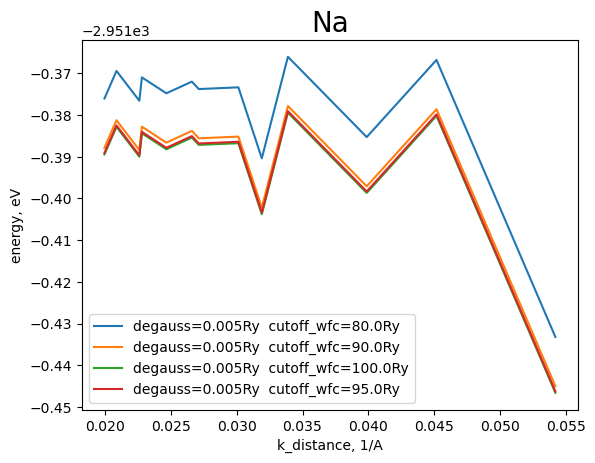

In [81]:
for degauss in set(df['degauss'].values):
    for cutoff_wfc in set(df['cutoff_wfc'].values):
        da=df.loc[df['degauss']==degauss]
        db=da.loc[da['cutoff_wfc']==cutoff_wfc]
        x=db['k_distance'].values
        y=db['energy'].values
        label='degauss='+str(degauss)+'Ry  '+'cutoff_wfc='+str(cutoff_wfc)+'Ry'
        plt.plot(x[6:],y[6:],label=label)
plt.title('Na',fontsize=20)
plt.xlabel('k_distance, 1/A')
plt.ylabel('energy, eV')
plt.legend()
plt.show()

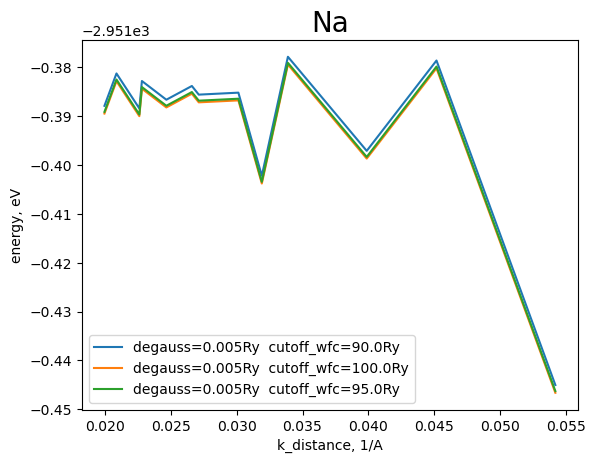

In [80]:
for degauss in set(df['degauss'].values):
    for cutoff_wfc in {90.0, 95.0, 100.0}:
        da=df.loc[df['degauss']==degauss]
        db=da.loc[da['cutoff_wfc']==cutoff_wfc]
        x=db['k_distance'].values
        y=db['energy'].values
        label='degauss='+str(degauss)+'Ry  '+'cutoff_wfc='+str(cutoff_wfc)+'Ry'
        plt.plot(x[6:],y[6:],label=label)
plt.title('Na',fontsize=20)
plt.xlabel('k_distance, 1/A')
plt.ylabel('energy, eV')
plt.legend()
plt.show()